In [29]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from prol.process import get_cycle

In [70]:
class SetParams:
    def __init__(self, dict) -> None:
        for k, v in dict.items():
            setattr(self, k, v)

def plotting(y, ci, args, trange, name):
    t = args.t
    T = t + trange
    y = y[t:T]
    ci = ci[t:T]

    N = args.N
    time = np.arange(t, T)
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(time, y, c="k", lw=2, label='cnn')
    ax.fill_between(time, y-ci, y+ci, alpha=0.2, color='k')

    unit = get_cycle(N)
    pattern = np.array((unit * math.ceil((T)/(2*N))))[t:T].astype("bool")

    for i in time[pattern]:
        ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.4, edgecolor=None, facecolor="blue"))
    for i in time[~pattern]:
        ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.4, edgecolor=None, facecolor="orange"))

    ax.set_xlabel("time")
    ax.set_ylabel("Instantaneous Risk")
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([time[0], time[-1]])

    ax.legend(loc=1)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='orange', alpha=0.4, label='task A: MNIST zero/one images labeled as 0/1'),
        Patch(facecolor='blue', alpha=0.4, label='task B: MNIST two/three images labeled as 0/1')
    ]
    fig.legend(handles=legend_elements, loc=8, bbox_to_anchor=(0.5, -0.18), frameon=False)

    plt.show()


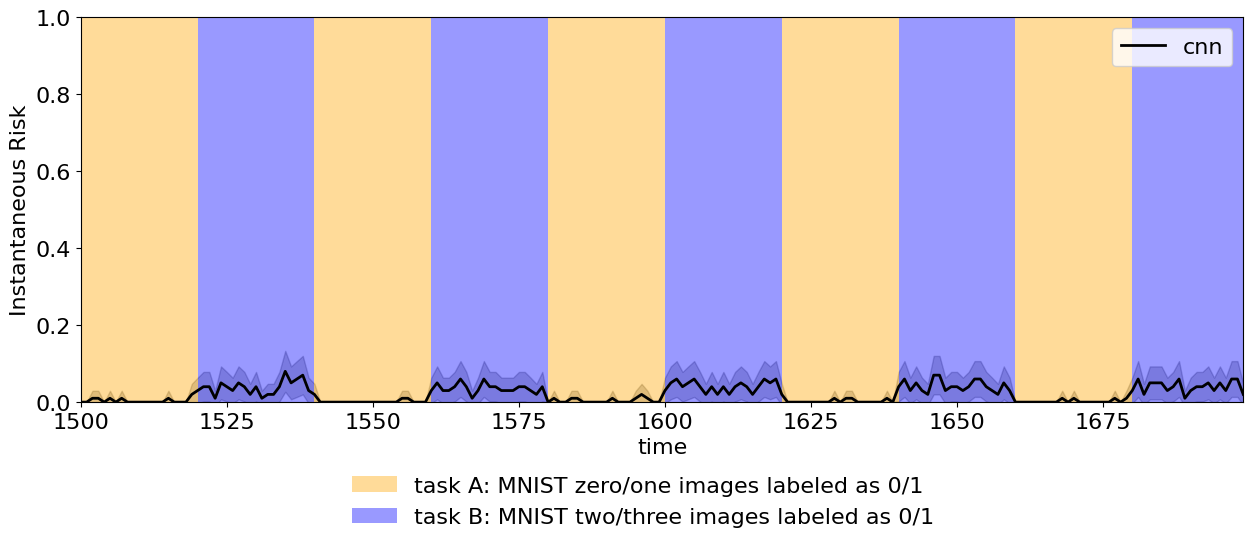

In [71]:
path = 'experiments/ABAB/multirun/2024-05-06/mnist-cnn/6'
with open(path + '/outputs.pkl', 'rb') as f:
    outputs = pickle.load(f)

args = SetParams(outputs['args'])
plotting(outputs['inst_risk'], outputs['ci'], args, 200, 'test')

In [73]:
time_list = []
risk_list = []
for i in range(10):
    fname = f'experiments/ABAB/multirun/2024-05-06/mnist-cnn/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

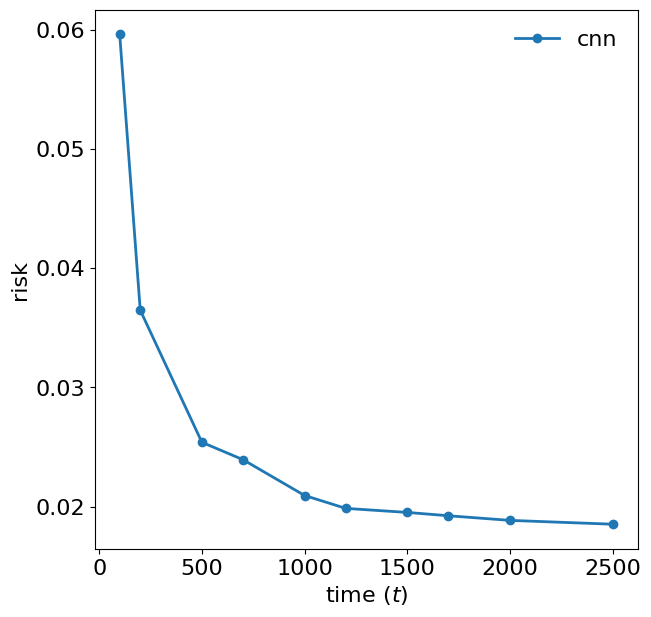

In [74]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(time_list, risk_list, marker='o', lw=2, label='cnn')
ax.set_xlabel(r"time ($t$)")
ax.set_ylabel(r"risk")
ax.legend(frameon=False)
plt.show()